In [1]:
import numpy as np 
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("..")
from nets import Nets
from utils import *

import re

from sklearn.cluster import DBSCAN


from postprocessing import *
from analysis import *

%load_ext autoreload
%autoreload 2

In [2]:
exp_root = "/Users/daniellengyel/flat_sharp/flat_sharp/experiments/{}" #"/Users/daniellengyel/flat_sharp/gaussian/gaussian_experiments/Apr03_17-38-00_Daniels-MacBook-Pro-4.local"
# configs = get_configs(experiment_folder)

In [43]:
exp_id = "1590274169.318323"
step = 100

weights = [exp_dict["stuff"]["runs"][exp_id][step]["Potential"]["curr"]["net"][str(nn)] for nn in range(20)]
smpl_idx = exp_dict["resampling_idxs"][exp_id][str(step)]

In [48]:
for nn in range(20):
    print("nn {} weight {}".format(nn, weights[nn]))

nn 0 weight 0.47900766134262085
nn 1 weight 0.24233348667621613
nn 2 weight 0.326823890209198
nn 3 weight 0.46272408962249756
nn 4 weight 0.4396985173225403
nn 5 weight 0.4093787670135498
nn 6 weight 0.5092207789421082
nn 7 weight 0.3510311245918274
nn 8 weight 0.3892554044723511
nn 9 weight 0.2633032202720642
nn 10 weight 0.45003873109817505
nn 11 weight 0.3361014425754547
nn 12 weight 0.27634090185165405
nn 13 weight 0.5022891163825989
nn 14 weight 0.2551276683807373
nn 15 weight 0.43918606638908386
nn 16 weight 0.3953227698802948
nn 17 weight 0.4107484221458435
nn 18 weight 0.646403968334198
nn 19 weight 0.437918096780777


In [86]:
exp_dict["stuff"]["runs"]["1590488108.532396"][50].keys()

dict_keys(['Accuracy', 'Loss', 'Potential', 'Trace', 'Kish', 'WeightVarTrace'])

In [558]:
# get all sorts of data
exp_dict = {}

experiment_folder = exp_root.format("MNIST/stop_resampling") #Apr27_00-03-27_Daniels-MacBook-Pro-4.local
exp_dict["stuff"] = get_stuff(experiment_folder)
# exp_dict["models"] = get_all_models(experiment_folder, -1)
exp_dict["resampling_idxs"] = get_sample_idxs(experiment_folder)

Getting tsne.
Error: tsne could not be found
Getting runs.
Getting trace.
Getting acc.
Getting dist.
Getting loss.
Getting grad.


In [559]:


stats_df = get_end_stats(exp_dict["stuff"])
# stats_df = stats_df[stats_df["Mean Train Loss"] < 0.25]
stats_df.sort_values(by="Acc Test Mean", ascending=False)

,Acc Test Max,Acc Test Mean,Acc Test Min,Acc Train Max,Acc Train Mean,Acc Train Min,Dist Max,Dist Mean,Dist Min,Gap Mean,Loss Test Max,Loss Test Mean,Loss Test Min,Loss Train Max,Loss Train Mean,Loss Train Min,Trace Max,Trace Mean,Trace Mean Std,Trace Min
1590488108.532396,0.9443,0.943755,0.9431,1.0,1.0,1.0,24.309381,24.047377,19.904516,-0.056245,0.213263,0.212432,0.211825,0.004555,0.004537,0.00452,5.712422,5.303274,1.038982,5.083379


In [33]:


stats_df = get_end_stats(exp_dict["stuff"])
# stats_df = stats_df[stats_df["Mean Train Loss"] < 0.25]
stats_df.sort_values(by="Acc Test Mean", ascending=False)

,Acc Test Max,Acc Test Mean,Acc Test Min,Acc Train Max,Acc Train Mean,Acc Train Min,Gap Mean,Loss Test Max,Loss Test Mean,Loss Test Min,Loss Train Max,Loss Train Mean,Loss Train Min,Trace Max,Trace Mean,Trace Mean Std,Trace Min,learning_rate,softmax_beta
1590258149.216182,0.9511,0.950950,0.9508,1.000000,1.000000,1.000000,-0.049050,0.228558,0.228436,0.228345,0.000235,0.000235,0.000235,0.176961,0.159289,0.018838,0.143306,3,100
1590258141.549438,0.9514,0.950905,0.9507,1.000000,1.000000,1.000000,-0.049095,0.230327,0.230087,0.229828,0.000281,0.000280,0.000280,0.195636,0.180707,0.024949,0.168538,3,1
1590273481.150822,0.9507,0.950455,0.9501,0.992333,0.992333,0.992333,-0.041878,0.243075,0.242934,0.242822,0.045063,0.045000,0.044955,1.364603,1.209709,0.440037,1.036496,3,-100
1590258143.5921988,0.9506,0.950430,0.9502,1.000000,1.000000,1.000000,-0.049570,0.232872,0.232674,0.232428,0.000285,0.000284,0.000284,0.205001,0.185568,0.025315,0.174080,3,-1
1590258139.372339,0.9527,0.950400,0.9485,1.000000,1.000000,1.000000,-0.049600,0.240414,0.228081,0.215392,0.000288,0.000230,0.000203,0.190765,0.164346,0.019684,0.148290,3,0
1590274152.405887,0.9504,0.950310,0.9503,1.000000,1.000000,1.000000,-0.049690,0.225092,0.225062,0.225021,0.000172,0.000172,0.000172,0.139618,0.128468,0.014502,0.120383,3,500
1590274169.318323,0.9493,0.949250,0.9492,0.990167,0.990167,0.990167,-0.040917,0.271549,0.271329,0.271238,0.075427,0.075360,0.075286,1.706387,1.317955,0.469214,1.132342,3,-500
1590258147.138657,0.9490,0.948720,0.9485,0.999500,0.999500,0.999500,-0.050780,0.237578,0.237422,0.237186,0.003030,0.002990,0.002960,0.196598,0.178070,0.032890,0.156309,3,-10
1590258145.777937,0.9479,0.947720,0.9474,1.000000,1.000000,1.000000,-0.052280,0.241522,0.241224,0.241056,0.000205,0.000205,0.000205,0.155557,0.148187,0.016668,0.135462,3,10
1590258146.3691258,0.9449,0.944420,0.9438,1.000000,1.000000,1.000000,-0.055580,0.221967,0.221631,0.221329,0.003347,0.003323,0.003310,4.577756,4.048382,0.769949,3.776895,0.3,-10


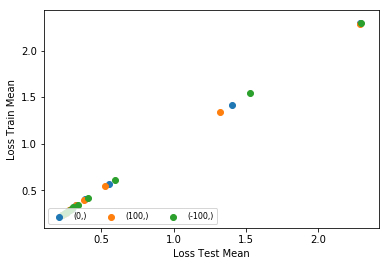

In [255]:

            
plot_stats(stats_df,  "Loss Test Mean", "Loss Train Mean", 
           filter_seperate=[], filter_not_seperate=["softmax_beta"], 
           Y_axis_bounds=None)



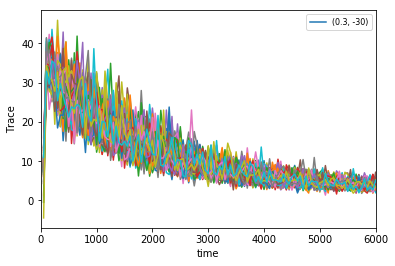

In [538]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Trace", 
             filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=[0, 6000], Y_axis_bounds=None,
            pre_filtered_exp_ids=None)


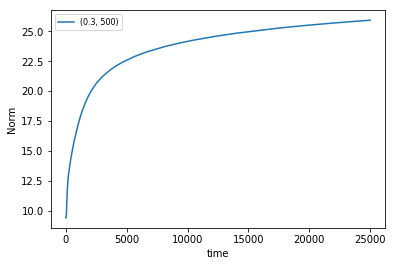

In [135]:

plot_special(exp_dict, "time", "Norm", 
             filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
            pre_filtered_exp_ids=None)

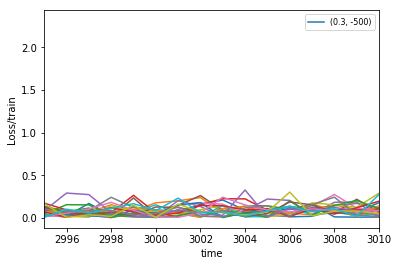

In [525]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Loss/train", 
             filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=[2995, 3010], Y_axis_bounds=None,
            pre_filtered_exp_ids=None)


Correlation for (0.3, -500) trace:all/grad: 0.5776698519977957


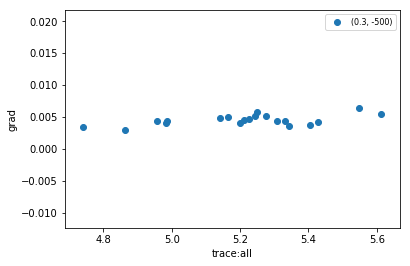

In [55]:
plot_special(exp_dict, "trace:all", 
             "grad", filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=None)

Correlation for (0.3, 0) trace:all/grad: 0.36826228884276463
Correlation for (0.3, 1) trace:all/grad: 0.04459158226941844
Correlation for (0.3, 100) trace:all/grad: 0.3208605181368315
Correlation for (0.3, 10) trace:all/grad: 0.07293312644687439
Correlation for (0.3, -500) trace:all/grad: 0.07443665116147745
Correlation for (0.3, 500) trace:all/grad: 0.18158370790347214
Correlation for (0.3, -10) trace:all/grad: 0.3489382449721909
Correlation for (0.3, -100) trace:all/grad: 0.22075146334857504
Correlation for (0.3, -1) trace:all/grad: 0.10779031912910172


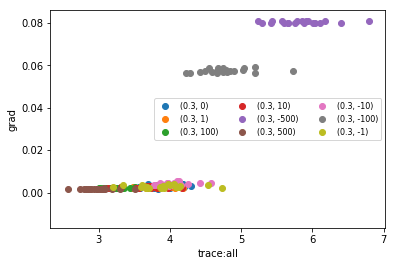

Correlation for (3, 0) trace:all/grad: 0.6226957766756916
Correlation for (3, 1) trace:all/grad: 0.1131605869586421
Correlation for (3, 100) trace:all/grad: 0.14413669599010098
Correlation for (3, 10) trace:all/grad: -0.0071050293219857745
Correlation for (3, -500) trace:all/grad: 0.09028189085923795
Correlation for (3, 500) trace:all/grad: -0.049926314307105764
Correlation for (3, -10) trace:all/grad: -0.311476338076989
Correlation for (3, -100) trace:all/grad: -0.3041377655637854
Correlation for (3, -1) trace:all/grad: -0.21883315439020007


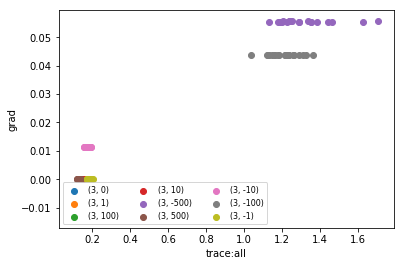

In [52]:
plot_special(exp_dict, "trace:all", 
             "grad", filter_seperate=["learning_rate"], filter_not_seperate=["softmax_beta"],
             save_exp_path=experiment_folder, X_axis_bounds=None)


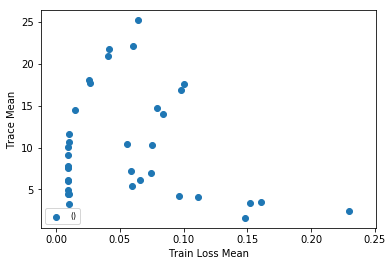

In [42]:

      
plot_stats(stats_df,  "Train Loss Mean", "Trace Mean",filter_by=[], seperate=True)



ValueError: x and y must be the same size

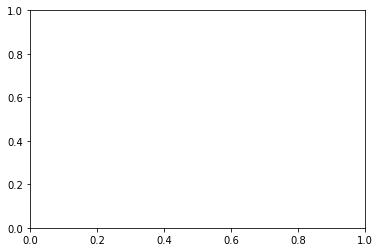

In [6]:
a = np.array([[1,2], [3,4]])
plt.scatter(list(range(len(a))), a)
plt.show()

In [539]:
def sampling_plot_arr(values_arr, resampling_arr):
    x_vals = []
    y_vals = []

    for p in range(len(values_arr)):
        last_resampling = 0
        already_added = False

        for t in range(len(values_arr[p])):
            if resampling_arr[t][p] != p:
                if (last_resampling == 0) and (not already_added):
                    x_vals.append(list(range(last_resampling, t + 1)))
                    y_vals.append(values_arr[p][last_resampling:t + 1])
                    already_added = True
                else:
                    starts_at = values_arr[resampling_arr[last_resampling][p]][last_resampling]
                    x_vals.append(list(range(last_resampling, t + 1)))
                    y_vals.append([starts_at] + list(values_arr[p][last_resampling + 1:t + 1]))

                last_resampling = t

        if (last_resampling == 0):
            x_vals.append(list(range(last_resampling, t + 1)))
            y_vals.append(values_arr[p][last_resampling:t + 1])
        else:
            starts_at = values_arr[resampling_arr[last_resampling][p]][last_resampling]
            x_vals.append(list(range(last_resampling, t + 1)))
            y_vals.append([starts_at] + list(values_arr[p][last_resampling + 1:t + 1]))
    return x_vals, y_vals


In [540]:
y_vals[0].shape

(6000, 20)

In [543]:
Y_axis_name = "Potential/curr"
exp_ids = ["1590488108.532396"]

x_vals, y_vals = get_runs_plots(exp_dict, Y_axis_name, exp_ids)


In [556]:
time_range = [0, 5999]

sampling_arr = exp_dict["resampling_idxs"][exp_ids[0]]
resampling_arr = np.array([sampling_arr[str(i)] for i in range(6000)])[1:]
y_vals_reduced = y_vals[0][time_range[0]:time_range[1]]
resampling_arr_reduced = resampling_arr[time_range[0]: time_range[1]]
n_x, n_y = sampling_plot_arr(y_vals_reduced.T, resampling_arr_reduced)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11e746ea0> (for post_execute):


KeyboardInterrupt: 

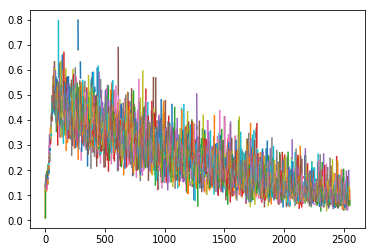

In [557]:
for x, y in zip(n_x, n_y):
    plt.plot(x, y)
    
plt.show()

In [549]:
k = 1

y_vals_reduced[k]

array([0.13687325, 0.11720818, 0.14683002, 0.14364614, 0.11174791,
       0.14190209, 0.13323161, 0.17232294, 0.14031003, 0.12600492,
       0.13567854, 0.13407512, 0.11874119, 0.14178073, 0.10190372,
       0.14129782, 0.14182243, 0.13166702, 0.16100547, 0.13567692,
       0.13793676, 0.11688023, 0.1255141 , 0.13206178, 0.12438663,
       0.12086723, 0.12732029, 0.19309922, 0.12375545, 0.11702964,
       0.16537547, 0.14448038, 0.12955256, 0.14363471, 0.10865706,
       0.13222022, 0.11832235, 0.11529855, 0.14899905, 0.13854988,
       0.1435574 , 0.17305885, 0.12746559, 0.13893948, 0.17148684,
       0.13789706, 0.12519985, 0.1351146 , 0.11191284, 0.14000875,
       0.12124695, 0.11986069, 0.12770154, 0.11968146, 0.10721815,
       0.152876  , 0.12438879, 0.14267285, 0.11103907, 0.14454867,
       0.1393891 , 0.1309275 , 0.15737648, 0.17181233, 0.13437679,
       0.15015717, 0.11940996, 0.12546724, 0.11319667, 0.1713759 ,
       0.12925017, 0.11468383, 0.15053543, 0.15520638, 0.17476

In [550]:
softmax(y_vals_reduced[k], beta=-50)

array([0.00997334, 0.01071719, 0.00961663, 0.00972929, 0.01093341,
       0.00979155, 0.01010708, 0.0087604 , 0.00984874, 0.01037782,
       0.01001702, 0.01007594, 0.01065726, 0.0097959 , 0.01133429,
       0.00981322, 0.00979441, 0.01016509, 0.00913069, 0.01001708,
       0.00993462, 0.01073006, 0.01039647, 0.01015042, 0.01043944,
       0.0105747 , 0.01032801, 0.00811929, 0.01046357, 0.0107242 ,
       0.00898589, 0.00969964, 0.01024402, 0.00972969, 0.01105772,
       0.01014454, 0.0106736 , 0.01079232, 0.00954063, 0.00991236,
       0.00973244, 0.00873685, 0.01032252, 0.00989824, 0.00878724,
       0.00993606, 0.01040843, 0.0100377 , 0.01092681, 0.0098596 ,
       0.01056003, 0.01061371, 0.01031362, 0.01062067, 0.01111608,
       0.00940628, 0.01043936, 0.00976399, 0.01096179, 0.00969722,
       0.00988198, 0.01019263, 0.0092527 , 0.00877678, 0.01006483,
       0.0095003 , 0.01063122, 0.01039826, 0.01087562, 0.0087908 ,
       0.01025536, 0.01081661, 0.00948716, 0.00932644, 0.00868

In [551]:
resampling_arr_reduced[k]

array([32, 52, 88, 35, 90, 62,  1, 92, 68, 99, 17, 13, 93, 69,  6, 75, 75,
       92, 70, 12,  1,  2,  2, 24, 85, 53, 54, 84, 12, 27, 58, 97, 55,  1,
       79, 23, 80, 38, 86, 74, 55, 13,  5, 12,  4, 10, 22, 71, 55,  1,  7,
       96, 56, 20, 25, 74, 19, 57, 97, 84, 23, 49, 61, 82, 15,  1,  6, 48,
       60, 56, 31, 98, 57, 37, 54, 74, 66, 26,  6, 36, 62, 20, 75,  6, 25,
       80, 19, 63, 52, 92, 26,  6, 73, 76, 90, 93,  1, 23, 61, 94])

In [552]:
sample_index_softmax(y_vals_reduced[k], list(range(5)), beta=500)


ValueError: 'a' and 'p' must have same size

No Potential/total for step 0
{0: [[[0, 0], array([0.1770224])]], 4: [[[0, 1], array([0.33240567])], [[20, 21], array([2.49645972])], [[25, 26], array([1.28394002])], [[64, 65], array([1.03889444])], [[103, 104], array([0.98112103])]], 39: [[[1, 2], array([0.31604916])]], 28: [[[2, 4], array([0.38251606, 0.36369875])], [[32, 33], array([1.61276615])], [[68, 69], array([1.23052442])]], 6: [[[4, 5], array([0.63296166])], [[81, 82], array([0.86998388])], [[93, 94], array([0.74539305])]], 30: [[[5, 6], array([0.6416783])], [[18, 19], array([1.54597384])]], 14: [[[6, 7], array([0.74168783])], [[39, 40], array([1.09853309])]], 26: [[[7, 8], array([0.89268947])], [[17, 18], array([1.59851474])], [[97, 98], array([0.64959311])], [[107, 108], array([0.78916663])]], 16: [[[8, 9], array([0.98087084])], [[15, 16], array([1.50363976])], [[53, 54], array([1.2752133])], [[63, 64], array([0.94940689])], [[110, 111], array([1.09587467])], [[111, 112], array([0.74477082])]], 37: [[[9, 10], array([1.5462

ValueError: x and y must be the same size

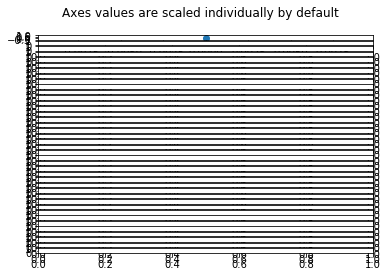

In [208]:
exp_runs = exp_dict["stuff"]["runs"]
var_name = "Potential/total"
running_average_gamma = 1
for exp in exp_runs:
    res_idx = exp_dict["resampling_idxs"][exp]
    res_idx_arr = []
    # indexing is because we save before and after training
    for t in range(1, len(res_idx) - 1):
        res_idx_arr.append(res_idx[str(t)])
    

    val_list = None

    for t in range(len(exp_runs[exp])):
        try:
            # going down the tree with node names given by var_name.split("/")
            curr_dict = exp_runs[exp][t]
            var_name_split = var_name.split("/")
            for n in var_name_split:
                curr_dict = curr_dict[n]

            if "net" in curr_dict:
                num_nets = int(max(curr_dict["net"], key=lambda x: int(x))) + 1  # +1 bc zero indexed
                to_append = np.array([curr_dict["net"][str(nn)] for nn in range(num_nets)])
                # to_append = np.mean(to_append)

            else:
                to_append = curr_dict[""]
            if val_list is None:
                val_list = [to_append]
            else:
                to_append = val_list[-1] * (1 - running_average_gamma) + running_average_gamma * to_append
                val_list.append(to_append)
        except:
            print("No {} for step {}".format(var_name, t))
    s_plot_dicts = sampling_plot_arr(np.array(val_list).T, res_idx_arr)
    sampling_plot(s_plot_dicts)

# Analysis 

Plots (FUNCTION):
ACC vs Trace
Train Loss vs Trace
ACC vs Train loss
Mean/COV ACC -- MEAN/COV TRACE -- MEAN/COV TRAIN LOSS (CORRELATIONS FOR ALL OF THESE)


Plot weightspace and input space 

In [175]:
# next step, get accuracy here... sucks we can't get it otherwise

In [171]:
configs = get_configs(experiment_folder)
config_to_id_map = get_config_to_id_map(configs)
ids = get_ids(config_to_id_map, config)

NameError: name 'config' is not defined

In [161]:
config = {'batch_test_size': 100,
 'batch_train_size': 16,
 'ess_threshold': None,
 'learning_rate': 0.001,
 'momentum': 0,
 'net_name': 'SimpleNet',
 'net_params': None, #[2, 2, 256, 1],
 'num_steps': 100,
 'num_nets': 100,
 'softmax_beta': None, #0,
 'torch_random_seed': 1,
 'sampling_tau': None,
 'weight_type': 'loss_gradient_weights'}

In [ ]:
import time

In [ ]:
for i in sorted(tsne_dict):
    print(i)
    plt.scatter(tsne_dict[i][:, 0], tsne_dict[i][:, 1])
    plt.show()
    

In [ ]:
tsne_dict = get_tsne_dict(experiment_folder, curr_dir)
for i in sorted(tsne_dict):
    print(i)
    plt.scatter(tsne_dict[i][:, 0], tsne_dict[i][:, 1])
    plt.show()

In [ ]:


models, sampled_idx = get_models(os.path.join(experiment_folder, "resampling", curr_dir), 0)
models_vecs = np.array([get_params_vec(m) for m in models.values()])

shortest_distance = float("inf")
shortest_pair = (None, None)

largest_distance = -float("inf")
largest_pair = (None, None)
for i in range(len(models_vecs)):
    for j in range(i + 1, len(models_vecs)):
        if np.linalg.norm(models_vecs[i] - models_vecs[j]) < shortest_distance:
            shortest_distance = np.linalg.norm(models_vecs[i] - models_vecs[j])
            shortest_pair = (i, j)
        if np.linalg.norm(models_vecs[i] - models_vecs[j]) > largest_distance:
            largest_distance = np.linalg.norm(models_vecs[i] - models_vecs[j])
            largest_pair = (i, j)


In [ ]:
shortest_distance

In [ ]:
largest_distance
np.linalg.norm(models_vecs[0])

In [ ]:
with open(os.path.join(experiment_folder, "data.pkl"), "rb") as f:
    data = pickle.load(f)

train_loader = DataLoader(data[0], batch_size=len(data[0]), shuffle=True)  # fix the batch size
test_loader = DataLoader(data[1], batch_size=len(data[1]))

largest_arr = []
largest_acc = []
shortest_arr = []
shortest_acc = []

largest_mags = []
shortest_mags = []

step_dir = get_all_model_steps(os.path.join(experiment_folder, "resampling", curr_dir))
for step in sorted(step_dir):
    print(step)
    models, sampled_idx = get_models(os.path.join(experiment_folder, "resampling", curr_dir), step)
    models_vecs = np.array([get_params_vec(m) for m in models.values()])
    
    largest_arr.append(np.linalg.norm(models_vecs[largest_pair[0]] - models_vecs[largest_pair[1]]))
    shortest_arr.append(np.linalg.norm(models_vecs[shortest_pair[0]] - models_vecs[shortest_pair[1]]))
    
    largest_acc.append([get_net_accuracy(models[str(largest_pair[0])], test_loader), get_net_accuracy(models[str(largest_pair[1])], test_loader)])
    shortest_acc.append([get_net_accuracy(models[str(shortest_pair[0])], test_loader), get_net_accuracy(models[str(shortest_pair[1])], test_loader)])


    largest_mags.append([np.linalg.norm(models_vecs[largest_pair[0]]), np.linalg.norm(models_vecs[largest_pair[1]])])
    shortest_mags.append([np.linalg.norm(models_vecs[shortest_pair[0]]),np.linalg.norm(models_vecs[shortest_pair[1]])])

In [ ]:
plt.plot(list(sorted(step_dir)), largest_arr )
plt.show()
plt.plot(list(sorted(step_dir)), np.array(largest_acc)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(largest_acc)[:, 1])
plt.show()

plt.plot(list(sorted(step_dir)), np.array(shortest_acc)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(shortest_acc)[:, 1])
plt.show()


plt.plot(list(sorted(step_dir)), np.array(largest_mags)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(largest_mags)[:, 1])
plt.show()

plt.plot(list(sorted(step_dir)), np.array(shortest_mags)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(shortest_mags)[:, 1])
plt.show()

In [90]:


all_dist = {}
for i in range(len(models)):
    for j in range(i+1, len(models)):
        a = get_params_vec(models[str(i)])
        b = get_params_vec(models[str(j)])

        all_dist[(i, j)] = torch.norm(a - b)

In [91]:
all_dist

{(0, 1): tensor(16.6315, grad_fn=<NormBackward0>),
 (0, 2): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 3): tensor(0.0025, grad_fn=<NormBackward0>),
 (0, 4): tensor(16.6317, grad_fn=<NormBackward0>),
 (0, 5): tensor(0.0025, grad_fn=<NormBackward0>),
 (0, 6): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 7): tensor(0.0040, grad_fn=<NormBackward0>),
 (0, 8): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 9): tensor(0.0032, grad_fn=<NormBackward0>),
 (0, 10): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 11): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 12): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 13): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 14): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 15): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 16): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 17): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 18): tensor(0.0022, grad_fn=<NormBackward0>),
 (0, 19): tensor(16.6315, grad_fn=<NormBackward0>),
 (0, 20): tensor(0.0025, g

In [94]:
models_vecs = np.array([get_params_vec(m).detach().numpy() for m in models.values()])

X_embedded = TSNE(n_components=2).fit_transform(models_vecs)

[]

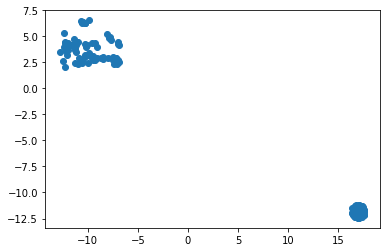

In [96]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.plot()

In [109]:
m = models[str(0)]
grad_steps= []
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  # fix the batch size

for data in train_loader:
    inputs, labels = data
    # Compute gradients for input.
    inputs.requires_grad = True

    # forward + backward + optimize
    outputs = m(inputs)
    loss = criterion(outputs.float(), labels)
    loss.backward(retain_graph=True)
    
    grad_steps.append(get_grad_params_vec(m).detach().numpy())

In [110]:
u, s, vh = np.linalg.svd(np.array(grad_steps), full_matrices=False)

array([7.4566307e+01, 4.2778692e+00, 3.0374603e+00, 9.4402808e-01,
       3.5643500e-01, 2.0473388e-01, 1.5873392e-01, 1.1142698e-01,
       9.3603715e-02, 7.8027248e-02, 6.5044165e-02, 6.0796760e-02,
       4.8285898e-02, 3.8336921e-02, 3.6647409e-02, 3.3087600e-02,
       2.9207643e-02, 2.3398781e-02, 2.1899553e-02, 2.1008376e-02,
       1.7819939e-02, 1.6101249e-02, 1.4436195e-02, 1.2744365e-02,
       1.1394381e-02, 1.0279431e-02, 9.7109778e-03, 9.3411161e-03,
       8.4276162e-03, 8.1074052e-03, 7.4696536e-03, 6.8786601e-03],
      dtype=float32)

In [ ]:
mnist_data = get_